In [1]:
# code based off https://github.com/kuixu/kitti_object_vis

%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from kitti_object import kitti_object, show_lidar_with_depth, show_lidar_on_image, \
                         show_image_with_boxes, show_lidar_topview_with_boxes

In [2]:
from mayavi import mlab
mlab.init_notebook('png') # do not use 'x3d' backend which leads to color missing

Notebook initialized with png backend.


../data/ training
../data/training/velodyne/000002.bin
('All point num: ', 126891)
('FOV point num: ', (20210, 4))
pc_velo (20210, 4)
==================== (20210, 4)
box3d_pts_3d_velo:
[[ 1.00930451e+01 -2.59680265e+00 -1.58725398e+00]
 [ 9.94447286e+00 -4.06922695e+00 -1.60436505e+00]
 [ 7.58657478e+00 -3.83105054e+00 -1.62648971e+00]
 [ 7.73514705e+00 -2.35862623e+00 -1.60937864e+00]
 [ 1.00760126e+01 -2.61402417e+00  4.25661514e-02]
 [ 9.92744033e+00 -4.08644848e+00  2.54550850e-02]
 [ 7.56954225e+00 -3.84827206e+00  3.33042804e-03]
 [ 7.71811451e+00 -2.37584776e+00  2.04414944e-02]]
box3d_pts_3d_velo:
[[36.84782306 -2.34327735 -1.98504785]
 [36.86273479 -3.92312037 -2.00158546]
 [32.50316668 -3.96378779 -2.0475751 ]
 [32.48825495 -2.38394477 -2.03103749]
 [36.83308939 -2.3581745  -0.57520344]
 [36.84800112 -3.93801752 -0.59174105]
 [32.48843302 -3.97868494 -0.63773069]
 [32.47352129 -2.39884192 -0.62119308]]



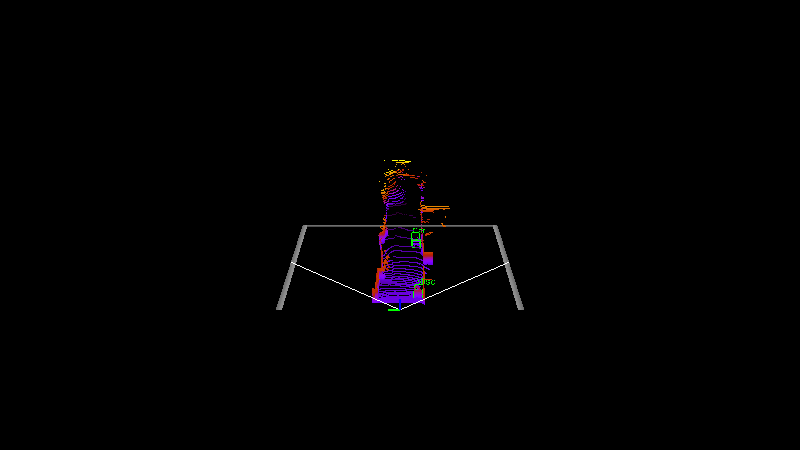

In [27]:
dataset = kitti_object('../data/', 'training')

data_idx = 2
objects = dataset.get_label_objects(data_idx)
pc_velo = dataset.get_lidar(data_idx)
calib = dataset.get_calibration(data_idx)
img = dataset.get_image(data_idx)
img_height, img_width, _ = img.shape

fig_3d = mlab.figure(bgcolor=(0, 0, 0), size=(800, 450))
show_lidar_with_depth(pc_velo, objects, calib, fig_3d, True, img_width, img_height)
fig_3d

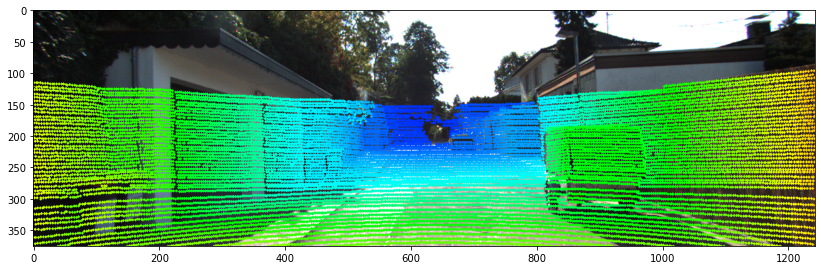

In [28]:
img_lidar = show_lidar_on_image(pc_velo[:, :3], img, calib, img_width, img_height)
img_lidar = cv2.cvtColor(img_lidar, cv2.COLOR_BGR2RGB)

fig_lidar = plt.figure(figsize=(14, 7))
ax_lidar = fig_lidar.subplots()
ax_lidar.imshow(img_lidar)
plt.show()

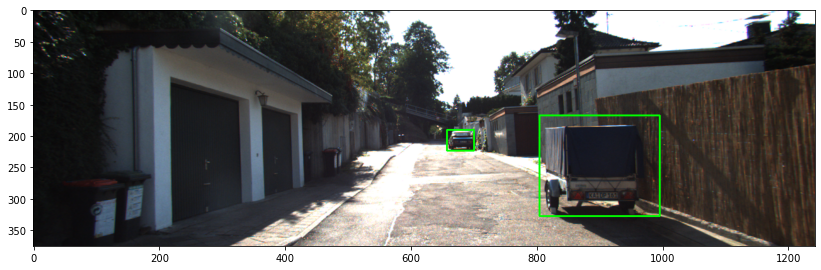

In [29]:
img_bbox2d, img_bbox3d = show_image_with_boxes(img, objects, calib)
img_bbox2d = cv2.cvtColor(img_bbox2d, cv2.COLOR_BGR2RGB)

fig_bbox2d = plt.figure(figsize=(14, 7))
ax_bbox2d = fig_bbox2d.subplots()
ax_bbox2d.imshow(img_bbox2d)
plt.show()

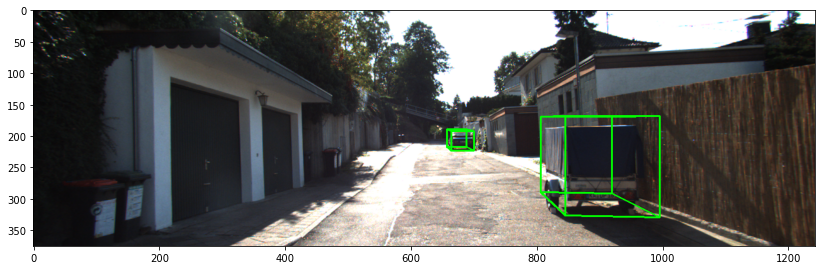

In [30]:
img_bbox3d = cv2.cvtColor(img_bbox3d, cv2.COLOR_BGR2RGB)

fig_bbox3d = plt.figure(figsize=(14, 7))
ax_bbox3d = fig_bbox3d.subplots()
ax_bbox3d.imshow(img_bbox3d)
plt.show()

top_image: (500, 300, 3)


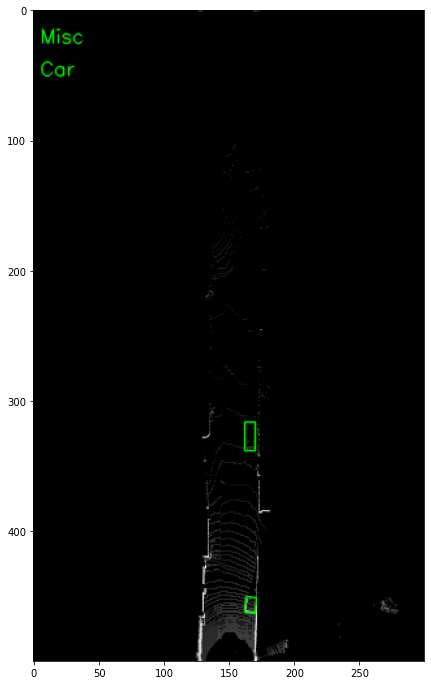

In [31]:
img_bev = show_lidar_topview_with_boxes(pc_velo, objects, calib)

fig_bev = plt.figure(figsize=(7, 14))
ax_bev = fig_bev.subplots()
ax_bev.imshow(img_bev)
plt.show()